## Ex5.1. Image histogram equalization


1.   Show image histogram (gray)
2.   Enhance image contrast by histogram equalization

Hint: Image histogram link.

In [48]:
import cv2
import numpy as np
import random
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

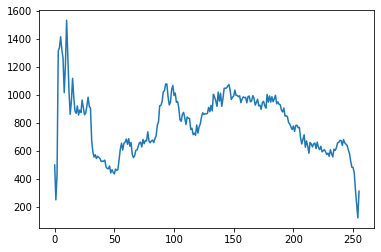

In [49]:
img = cv2.imread('Lovely New Zealand Waterfalls Love - waterfallslove.jfif',0)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

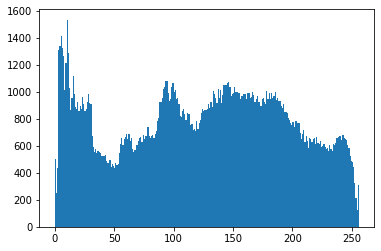

In [50]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('Lovely New Zealand Waterfalls Love - waterfallslove.jfif',0)
  
# alternative way to find histogram of an image
plt.hist(img.ravel(),256,[0,256])
plt.show()

## Ex5.2. Image blurring


1.   Add some noise to the input image
2.   Blur the image by using at least 05 different techniques (five outputs)


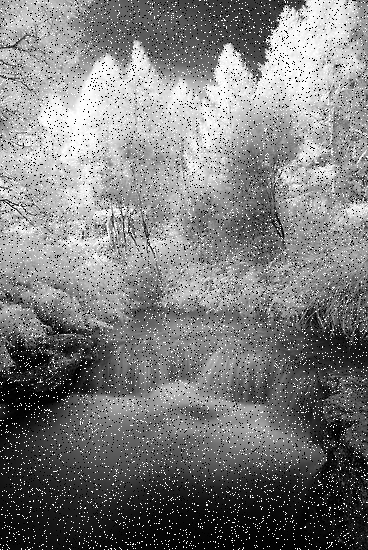

In [51]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('Lovely New Zealand Waterfalls Love - waterfallslove.jfif',0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)
cv2_imshow(noise_img)

Speckle Noise

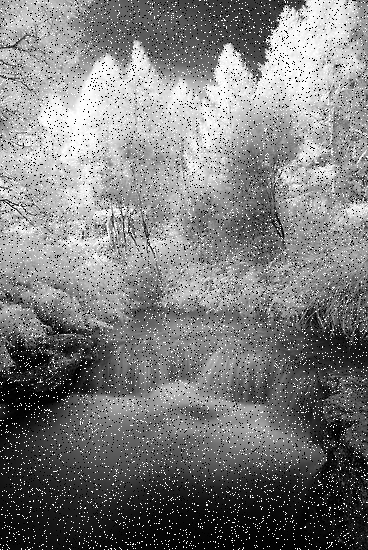

In [52]:
img = cv2.imread('Lovely New Zealand Waterfalls Love - waterfallslove.jfif') 
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss
cv2.imwrite('sp_noise.jpg', noise)
cv2_imshow(noise_img)

Gaussian Noise


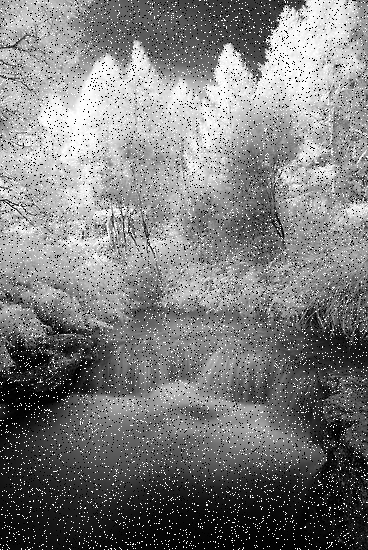

In [53]:
img = cv2.imread('Lovely New Zealand Waterfalls Love - waterfallslove.jfif') 
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
img_gauss = cv2.add(img,gauss)
cv2.imwrite('sp_noise.jpg', noise)
cv2_imshow(noise_img)

## Ex5.3. Image sharpening

Sharpen the input image by using at least 02 different techniques.

Hints: using addWeighted or filter2D function

In [54]:
!wget https://editor.analyticsvidhya.com/uploads/72274images.jpg

--2021-11-09 09:34:27--  https://editor.analyticsvidhya.com/uploads/72274images.jpg
Resolving editor.analyticsvidhya.com (editor.analyticsvidhya.com)... 104.22.55.101, 104.22.54.101, 172.67.38.119, ...
Connecting to editor.analyticsvidhya.com (editor.analyticsvidhya.com)|104.22.55.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43301 (42K) [image/jpeg]
Saving to: ‘72274images.jpg.2’

72274images.jpg.2   100%[===================>]  42.29K   138KB/s    in 0.3s    

2021-11-09 09:34:29 (138 KB/s) - ‘72274images.jpg.2’ saved [43301/43301]



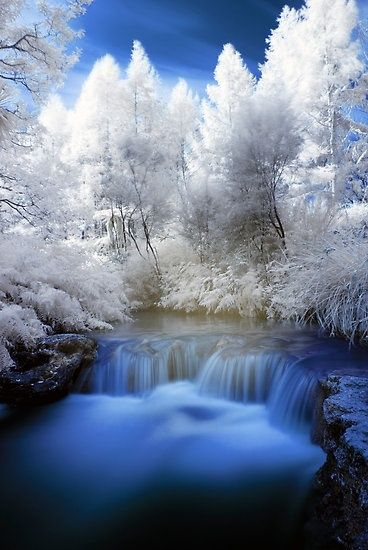

In [55]:
img = cv2.imread('72274images.jpg') 
cv2_imshow(img)

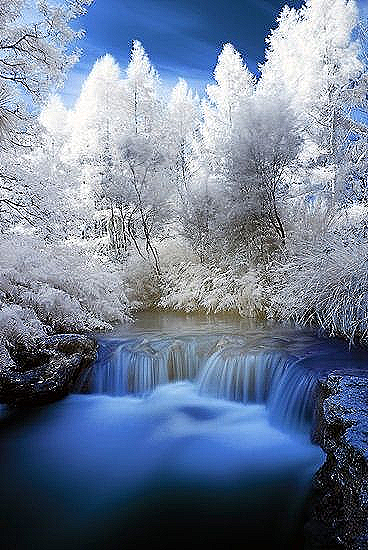

In [56]:
# load the image into system memory
image = cv2.imread('72274images.jpg', flags=cv2.IMREAD_COLOR)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)

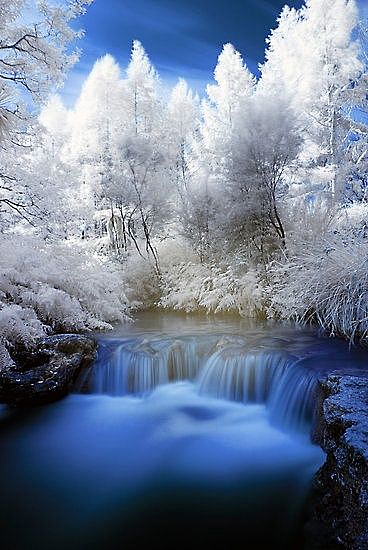

In [57]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

image = cv.imread('72274images.jpg')
sharpened_image = unsharp_mask(image)
cv2_imshow(sharpened_image)


## Ex5.4. Simple Motion Estimation in Videos using OpenCV

Extract motion from a video.
https://learnopencv.com/simple-background-estimation-in-videos-using-opencv-c-python/ 

Hint:  (Motion = current frame (image) - background (median frame))

1. Calculate a median frame (background estimation)

2. Convert the median frame to grayscale.

3. Loop over all frames in the video. 

4. Extract the current frame and convert it to grayscale.

5. Calculate the absolute difference between the current frame and the median frame.
(Frame differencing)

6. Threshold the above image to remove noise and binarize the output.
